# Setup and imports

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Research/Probe Automatic Review Generators/New_Reviews/'

In [ ]:
import pandas as pd
import numpy as np
import nltk
import sklearn
import torch
import math
import re
import gensim
import json

import matplotlib.pyplot as plt
from statistics import mean
from collections import Counter
from numpy import argmax
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('punkt')
!pip install transformers
from transformers import AutoTokenizer, AutoModel

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 2.5MB 25.9MB/s 
     |████████████████████████████████| 3.3MB 38.5MB/s 
     |████████████████████████████████| 901kB 40.9MB/s 


# Data

In [ ]:
f = open(path + 'Exp0/reviews_0.txt')
row = []
for x in f:
    grp = re.match(r'(.*?)_(.*?)\s=\s(.*)', x)
    review_no = grp.group(1)
    arxivId = str(grp.group(2))
    if grp.group(3) is None:
        review = ''
    else:
        review = str(grp.group(3))
    row.append([review_no, arxivId, review])
df = pd.DataFrame()
df['review_no'] = [i[0] for i in row]
df['arxivId'] = [i[1] for i in row]
df['review'] = [i[2] for i in row]
df.to_csv(path + 'reviews_0.csv', index=False)

In [ ]:
df0 = pd.read_csv(f'{path}/Exp0/reviews_0.csv'); df0.head(10)

,review_no,arxivId,review
0,1,2012.04715,"In this paper , the authors attempt to solve L..."
1,1,1810.00826,This paper studies the expressive power of gra...
2,1,1907.07355,This paper studies the effect of spurious stat...
3,1,1904.11943,"This paper proposes SWALP , an approach to low..."
4,1,1902.04911,This paper proposes an end-to-end neural model...
5,1,2005.06628,This paper proposes a pruning approach to redu...
6,1,2102.07983,This paper introduces FEWS ( Few-shot Examples...
7,1,1812.02425,This paper proposes to use a teacher-student e...
8,1,1901.06829,This paper proposes a novel approach to the ta...
9,1,1909.07557,This paper studies the Housing Market problem ...


In [ ]:
f = open(path + '/Exp3/reviews_3.txt')
row = []
for x in f:
    grp = re.match(r'(.*?)_(.*?)\s=\s(.*)', x)
    review_no = grp.group(1)
    arxivId = str(grp.group(2))
    if grp.group(3) is None:
        review = ''
    else:
        review = str(grp.group(3))
    row.append([review_no, arxivId, review])
df = pd.DataFrame()
df['review_no'] = [i[0] for i in row]
df['arxivId'] = [i[1] for i in row]
df['review'] = [i[2] for i in row]
df.to_csv(path + '/Exp3/reviews_3.csv', index=False)

In [ ]:
df3 = pd.read_csv(f'{path}/Exp3/reviews_3.csv'); df3.head(10)

,review_no,arxivId,review
0,1,2012.04715,"In this paper , the authors study the problem ..."
1,1,1810.00826,This paper studies the expressive power of gra...
2,1,1907.07355,This paper studies the effect of spurious stat...
3,1,1904.11943,"This paper proposes SWALP , an approach to low..."
4,1,1902.04911,This paper proposes an end-to-end neural model...
5,1,2005.06628,This paper proposes a pruning approach to redu...
6,1,2102.07983,This paper introduces a new low-shot WSD datas...
7,1,1812.02425,This paper proposes a method for compressing l...
8,1,1901.06829,This paper proposes a reinforcement learning b...
9,1,1909.07557,This paper studies the Housing Market problem ...


In [ ]:
f = open(path + '/Exp4/reviews_4.txt')
row = []
for x in f:
    grp = re.match(r'(.*?)_(.*?)\s=\s(.*)', x)
    review_no = grp.group(1)
    arxivId = str(grp.group(2))
    if grp.group(3) is None:
        review = ''
    else:
        review = str(grp.group(3))
    row.append([review_no, arxivId, review])
df = pd.DataFrame()
df['review_no'] = [i[0] for i in row]
df['arxivId'] = [i[1] for i in row]
df['review'] = [i[2] for i in row]
df.to_csv(path + '/Exp4/reviews_4.csv', index=False)

In [ ]:
df4 = pd.read_csv(f'{path}/Exp4/reviews_4.csv'); df4.head(10)

,review_no,arxivId,review
0,1,2012.04715,"In this paper , the authors study the problem ..."
1,1,1810.00826,This paper studies the expressive power of gra...
2,1,1907.07355,This paper studies the effect of spurious stat...
3,1,1904.11943,"This paper proposes SWALP , an approach to low..."
4,1,1902.04911,This paper proposes an end-to-end neural model...
5,1,2005.06628,This paper proposes a pruning approach to redu...
6,1,2102.07983,This paper introduces a new low-shot WSD datas...
7,1,1812.02425,This paper proposes a method for compressing l...
8,1,1901.06829,This paper proposes a novel approach to the ta...
9,1,1909.07557,This paper studies the Housing Market problem ...


In [ ]:
f = open(path + '/Exp5/reviews_5.txt')
row = []
for x in f:
    grp = re.match(r'(.*?)_(.*?)\s=\s(.*)', x)
    review_no = grp.group(1)
    arxivId = str(grp.group(2))
    if grp.group(3) is None:
        review = ''
    else:
        review = str(grp.group(3))
    row.append([review_no, arxivId, review])
df = pd.DataFrame()
df['review_no'] = [i[0] for i in row]
df['arxivId'] = [i[1] for i in row]
df['review'] = [i[2] for i in row]
df.to_csv(path + '/Exp5/reviews_5.csv', index=False)

In [ ]:
df5 = pd.read_csv(f'{path}/Exp5/reviews_5.csv'); df5.head(10)

,review_no,arxivId,review
0,1,2012.04715,"In this paper , the authors attempt to solve L..."
1,1,1810.00826,This paper studies the expressive power of gra...
2,1,1907.07355,This paper studies the effect of spurious stat...
3,1,1904.11943,"This paper proposes SWALP , an approach to low..."
4,1,1902.04911,This paper proposes an end-to-end neural model...
5,1,2005.06628,This paper proposes a pruning approach to redu...
6,1,2102.07983,This paper introduces a new low-shot WSD datas...
7,1,1812.02425,This paper proposes a method for compressing l...
8,1,1901.06829,This paper proposes a novel approach to the ta...
9,1,1909.07557,This paper studies the Housing Market problem ...


# Specter embeddings

In [ ]:
titles = ["A SAT-based Resolution of Lam's Problem",
          "How Powerful are Graph Neural Networks?",
          "Probing Neural Network Comprehension of Natural Language Arguments",
          "SWALP : Stochastic Weight Averaging in Low-Precision Training",
          "Learning to Select Knowledge for Response Generation in Dialog Systems",
          "schuBERT: Optimizing Elements of BERT",
          "FEWS: Large-Scale, Low-Shot Word Sense Disambiguation with the Dictionary",
          "MEAL: Multi-Model Ensemble via Adversarial Learning",
          "Read, Watch, and Move: Reinforcement Learning for Temporally Grounding Natural Language Descriptions in Videos",
          "Object Reachability via Swaps under Strict and Weak Preferences"]

In [ ]:
from typing import Dict, List
import json

import requests


URL = "https://model-apis.semanticscholar.org/specter/v1/invoke"
MAX_BATCH_SIZE = 16


def chunks(lst, chunk_size=MAX_BATCH_SIZE):
    """Splits a longer list to respect batch size"""
    for i in range(0, len(lst), chunk_size):
        yield lst[i: i + chunk_size]


def embed(papers):
    embeddings_by_paper_id: Dict[str, List[float]] = {}

    for chunk in chunks(papers):
        # Allow Python requests to convert the data above to JSON
        response = requests.post(URL, json=chunk)

        if response.status_code != 200:
            raise RuntimeError(
                "Sorry, something went wrong, please try later!")

        for paper in response.json()["preds"]:
            embeddings_by_paper_id[paper["paper_id"]] = paper["embedding"]

    return embeddings_by_paper_id


def Embeddings(SAMPLE_PAPERS):
    all_embeddings = embed(SAMPLE_PAPERS)

    # Prints { 'A': [4.089589595794678, ...], 'B': [-0.15814849734306335, ...]
    # }
    return all_embeddings

In [ ]:
SAMPLE_PAPERS_0 = []

for i in range(len(df0)):
  paper = {"paper_id": str(i), "title": titles[i], "abstract": df0.iloc[i]["review"]}
  SAMPLE_PAPERS_0.append(paper)

all_embeddings_0 = Embeddings(SAMPLE_PAPERS_0)

In [ ]:
SAMPLE_PAPERS_3 = []

for i in range(len(df3)):
  paper = {"paper_id": str(i), "title": titles[i%10], "abstract": df3.iloc[i]["review"]}
  SAMPLE_PAPERS_3.append(paper)

all_embeddings_3 = Embeddings(SAMPLE_PAPERS_3)

In [ ]:
SAMPLE_PAPERS_4 = []

for i in range(len(df4)):
  paper = {"paper_id": str(i), "title": titles[i%10], "abstract": df4.iloc[i]["review"]}
  SAMPLE_PAPERS_4.append(paper)

all_embeddings_4 = Embeddings(SAMPLE_PAPERS_4)

In [ ]:
SAMPLE_PAPERS_5 = []

for i in range(len(df5)):
  paper = {"paper_id": str(i), "title": titles[i%10], "abstract": df5.iloc[i]["review"]}
  SAMPLE_PAPERS_5.append(paper)

all_embeddings_5 = Embeddings(SAMPLE_PAPERS_5)

# Specter Distances

In [ ]:
def transform(lines):
    tokens = [w for s in lines for w in s]
    results = []
    label_enc = sklearn.preprocessing.LabelEncoder()
    onehot_enc = sklearn.preprocessing.OneHotEncoder()
    encoded_all_tokens = label_enc.fit_transform(list(set(tokens)))
    encoded_all_tokens = encoded_all_tokens.reshape(len(encoded_all_tokens), 1)
    onehot_enc.fit(encoded_all_tokens)
    for text_tokens in lines:
        encoded_words = label_enc.transform(text_tokens)
        encoded_words = encoded_words.reshape(len(encoded_words), 1)
        encoded_words = onehot_enc.transform(encoded_words)
        results.append(np.sum(encoded_words.toarray(), axis=0))
    return results


def calculate_position(values):
    x = []
    for pos, matrix in enumerate(values):
        if matrix > 0:
            x.append(pos)
    return x


def padding(sentence1, sentence2):
    x1 = sentence1.copy()
    x2 = sentence2.copy()
    diff = len(x1) - len(x2)
    if diff > 0:
        for i in range(0, diff):
            x2.append(-1)
    elif diff < 0:
        for i in range(0, abs(diff)):
            x1.append(-1)
    return x1, x2


def cosine(reviews):
    cosine_dist = []
    for i in range(len(reviews)):
        for j in range(len(reviews)):
            if i != j:
                score = sklearn.metrics.pairwise.cosine_similarity(
                    [reviews[i]], [reviews[j]])[0][0]
                rounded_score = "{:.2f}".format(score)
                cosine_dist.append(rounded_score)
    cosine_dist = list(map(float, cosine_dist))
    stats = {
        'min_val': min(cosine_dist),
        'max_val': max(cosine_dist),
        'mean_val': mean(cosine_dist)}
    return stats


def jaccard(reviews):
    text_tokens = [nltk.word_tokenize(i) for i in reviews]
    transformed_results = transform([i for i in text_tokens])
    jaccard_dist = []
    for i in range(len(reviews)):
        for j in range(len(reviews)):
            if i != j:
                y_actual = calculate_position(transformed_results[j])
                y_compare = calculate_position(transformed_results[i])
                x1, x2 = padding(y_actual, y_compare)
                score = 1 - gensim.matutils.jaccard(x1, x2)
                rounded_score = "{:.2f}".format(score)
                jaccard_dist.append(rounded_score)
    jaccard_dist = list(map(float, jaccard_dist))
    print(jaccard_dist)
    stats = {
        'min_val': min(jaccard_dist),
        'max_val': max(jaccard_dist),
        'mean_val': mean(jaccard_dist)}
    return stats

def cosine_rel(main, reviews):
    compare_with = [main]
    cosine_dist = []
    for i in range(len(reviews)):
        score = sklearn.metrics.pairwise.cosine_similarity(
            compare_with, [reviews[i]])[0][0]
        rounded_score = "{:.2f}".format(score)
        cosine_dist.append(rounded_score)
    cosine_dist = list(map(float, cosine_dist))
    stats = {
        'min_val': min(cosine_dist),
        'max_val': max(cosine_dist),
        'mean_val': mean(cosine_dist)}
    return stats


def jaccard_rel(reviews):
    text_tokens = [nltk.word_tokenize(i) for i in reviews]
    transformed_results = transform([i for i in text_tokens])
    jaccard_dist = []
    print(len(reviews))
    for i in range(len(reviews)-1):
        y_actual = calculate_position(transformed_results[0])
        y_compare = calculate_position(transformed_results[i+1])
        x1, x2 = padding(y_actual, y_compare)
        if i==9:
          print(x1,x2)
        score = 1 - gensim.matutils.jaccard(x1, x2)
        rounded_score = "{:.2f}".format(score)
        jaccard_dist.append(rounded_score)
    jaccard_dist = list(map(float, jaccard_dist))
    print(jaccard_dist)
    stats = {
        'min_val': min(jaccard_dist),
        'max_val': max(jaccard_dist),
        'mean_val': mean(jaccard_dist)}
    return stats

# Specter plots

## Exp 3

In [ ]:
from matplotlib.gridspec import GridSpec

[0.46, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.4, 0.46, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.34, 0.38, 0.42, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28, 0.38, 0.42, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28, 0.38, 0.42, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28, 0.38, 0.42, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28, 0.38, 0.42, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28, 0.38, 0.42, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28, 0.38, 0.42, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28, 0.4, 0.34, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28]
[0.45, 0.47, 1.0, 0.83, 1.0, 0.81, 0.76, 0.46, 0.55, 0.45, 0.52, 0.45, 0.45, 0.45, 0.43, 0.4, 0.34, 0.46, 0.47, 0.52, 0.47, 0.47, 0.47, 0.45, 0.45, 0.48, 0.6, 1.0, 0.45, 0.47, 0.83, 1.0, 0.81, 0.76, 0.46, 0.55, 0.83, 0.45, 0.47, 0.83, 0.83, 0.87, 0.82, 0.49, 0.56, 1.0, 0.45, 0.47, 1.0, 0.83, 0.81, 0.76, 0.46, 0.55, 0.81, 0.43, 0.45, 0.81, 0.87, 0.81, 0.85, 0.51, 0.53, 0.76, 0.4, 0.45, 0.76, 0.82, 0.76, 0.85, 0.56, 0.5, 0.46, 0.34, 0.48, 0.46, 0.49, 0.46, 0.51, 0.56, 0.51, 0.55, 0.46, 0.6, 0.55, 0.5

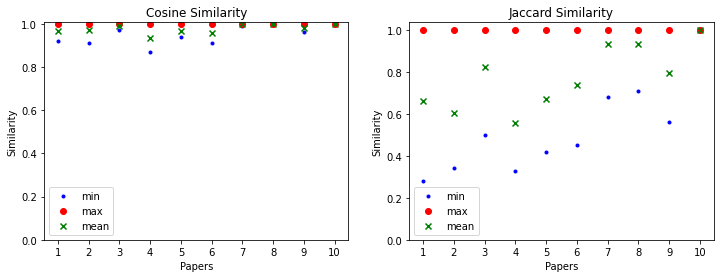

In [ ]:
fig = plt.figure(figsize=(12, 4))
gs = GridSpec(nrows=1, ncols=2)

ax = fig.add_subplot(gs[0, 0])
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_3)):
      if j%10 == i:
        embeds.append(all_embeddings_3[f"{j}"])
    vals = cosine(embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

ax1 = fig.add_subplot(gs[0, 1])
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df3)):
      if j%10 == i:
        new_df = new_df.append(df3.iloc[j])
    vals = jaccard(new_df["review"])
    ax1.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax1.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax1.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax1.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

plt.savefig(f'{path}/Exp3/intre_results', dpi=100)
plt.show()

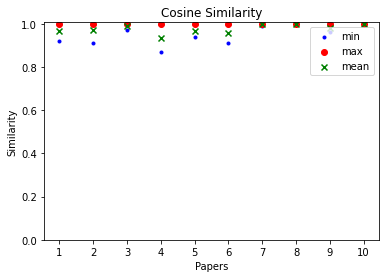

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_3)):
      if j%10 == i:
        embeds.append(all_embeddings_3[f"{j}"])
    vals = cosine(embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/Exp3/exp3_cosine', dpi=100)
plt.show()

[0.46, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.4, 0.46, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.34, 0.38, 0.42, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28, 0.38, 0.42, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28, 0.38, 0.42, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28, 0.38, 0.42, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28, 0.38, 0.42, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28, 0.38, 0.42, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28, 0.38, 0.42, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28, 0.4, 0.34, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28]
[0.45, 0.47, 1.0, 0.83, 1.0, 0.81, 0.76, 0.46, 0.55, 0.45, 0.52, 0.45, 0.45, 0.45, 0.43, 0.4, 0.34, 0.46, 0.47, 0.52, 0.47, 0.47, 0.47, 0.45, 0.45, 0.48, 0.6, 1.0, 0.45, 0.47, 0.83, 1.0, 0.81, 0.76, 0.46, 0.55, 0.83, 0.45, 0.47, 0.83, 0.83, 0.87, 0.82, 0.49, 0.56, 1.0, 0.45, 0.47, 1.0, 0.83, 0.81, 0.76, 0.46, 0.55, 0.81, 0.43, 0.45, 0.81, 0.87, 0.81, 0.85, 0.51, 0.53, 0.76, 0.4, 0.45, 0.76, 0.82, 0.76, 0.85, 0.56, 0.5, 0.46, 0.34, 0.48, 0.46, 0.49, 0.46, 0.51, 0.56, 0.51, 0.55, 0.46, 0.6, 0.55, 0.5

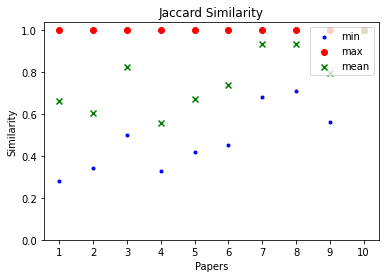

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df3)):
      if j%10 == i:
        new_df = new_df.append(df3.iloc[j])
    vals = jaccard(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/Exp3/exp3_jaccard', dpi=100)
plt.show()

This paper studies the expressive power of graph neural networks ( GNNs ) in the context of the Weisfeiler-Lehman graph isomorphism test . In particular , the paper shows that the most powerful GNN , Graph Isomorphism Network ( GIN ) , has high representational power as it almost perfectly fits the training data , whereas GNN variants often severely underfit the data . The paper then proposes a simple architecture , GraphSAGE , that is provably the most expressive among the class of GNN . The experimental results show that the proposed model achieves state-of-the-art results on a number of graph classification tasks . Overall , this paper is well-written and easy to follow . However , I have the following concerns : 1 . The authors claim that GIN is able to represent injective multiset functions , however , it is not clear to me why GIN can not represent simple graph structures such as regular graphs . 2 .Theorem 3.1 states that GNN can not learn to distinguish simple graph structure . But in the experiments , the authors only compare GIN with mean-pooling and max pooling . It would be better if the authors can also compare with other GNN models such as GCN and GraphSage . 3 .In the experimental results , the performance of the proposed GIN model is not better than the existing models . It is better to compare with the existing GNN model such as GIN and GCN . 4 .In Section 5.2.1 , GIN seems to be better than GCN in terms of classification accuracy , but it is unclear to me how to interpret the results .

----

This paper studies the expressive power of graph neural networks ( GNNs ) to represent different graph structures . The main contribution of this paper is to analyze the discriminative power of popular GNN variants , such as Graph Convolutional Networks ( GCN ) and GraphSAGE , and show that they can not learn to distinguish certain simple graph structures such as subtrees . The authors then develop a simple architecture that is provably the most expressive among the class of GNN and is as powerful as the Weisfeiler-Lehman graph isomorphism test . The paper is well-written and easy to follow . However , I have the following concerns about this paper . 1 .Theoretical results are based on the assumption that the graph is a set of multisets of bounded size , which is not true in practice . For example , in the proof of Lemma 3.1 , the authors assume that the embedding of a multiset is unique for each pair ( c , X ) , but in practice , the embeddings of c and X are not unique . 2 .Theorem 3.2 shows that the representation of a GNN does not satisfy the conditions in Theorem 3 . Theorem 4 shows that GNN with mean aggregators are not expressive , but it is not clear why this is the case . 3 .In the experiments , the performance of the proposed method is not better than the state-of-the-art methods . It would be better if the authors can compare the performance with other GNN methods such as GCN and GraphSage . 4 .The experimental results are not convincing . The proposed method does not outperform the other methods .

11
[0, 1, 2, 3, 13, 20, 23, 47, 55, 57, 61, 67, 71, 73, 76, 80, 83, 84, 85, 87, 89, 93, 95, 96, 98, 99, 107, 109, 112, 114, 116, 119, 120, 123, 124, 126, 129, 130, 131, 132, 134, 139, 142, 144, 145, 146, 148, 151, 152, 154, 155, 156, 157, 159, 160, 162, 163, 169, 170, 173, 175, 176, 178, 179, 181, 182, 184, 186, 187, 189, 192, 193, 196, 197, 198, 203, 204, 206, 207, 208, 209, 212, 213, 214, 217, 218, 219, 222, 225, 226, 227, 229, 233, 235, 236, 237, 241, 242, 243, 245, 249, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 69, 70, 71, 72, 74, 75, 76, 77, 82, 83, 84, 85, 86, 87, 89, 90, 95, 96, 97, 99

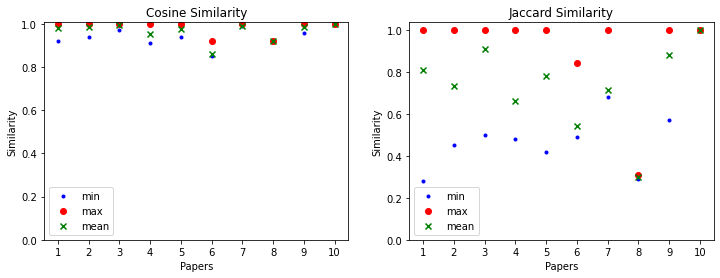

In [ ]:
fig = plt.figure(figsize=(12, 4))
gs = GridSpec(nrows=1, ncols=2)

ax = fig.add_subplot(gs[0, 0])
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_3)):
      if j%10 == i:
        embeds.append(all_embeddings_3[f"{j}"])
    vals = cosine_rel(all_embeddings_0[f"{i}"], embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

ax1 = fig.add_subplot(gs[0, 1])
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    new_df = new_df.append(df0.iloc[i])
    for j in range(len(df3)):
      if j%10 == i:
        new_df = new_df.append(df3.iloc[j])
    vals = jaccard_rel(new_df["review"])
    ax1.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax1.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax1.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax1.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

plt.savefig(f'{path}/Exp3/intra_results', dpi=100)
plt.show()

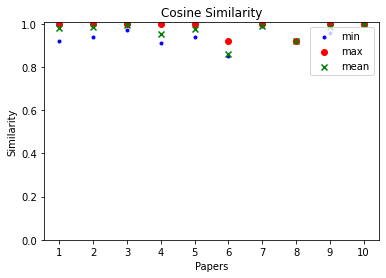

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_3)):
      if j%10 == i:
        embeds.append(all_embeddings_3[f"{j}"])
    vals = cosine_rel(all_embeddings_0[f"{i}"], embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/Exp3/exp3_cosine_rel', dpi=100)
plt.show()

11
[0, 1, 2, 3, 13, 20, 23, 47, 55, 57, 61, 67, 71, 73, 76, 80, 83, 84, 85, 87, 89, 93, 95, 96, 98, 99, 107, 109, 112, 114, 116, 119, 120, 123, 124, 126, 129, 130, 131, 132, 134, 139, 142, 144, 145, 146, 148, 151, 152, 154, 155, 156, 157, 159, 160, 162, 163, 169, 170, 173, 175, 176, 178, 179, 181, 182, 184, 186, 187, 189, 192, 193, 196, 197, 198, 203, 204, 206, 207, 208, 209, 212, 213, 214, 217, 218, 219, 222, 225, 226, 227, 229, 233, 235, 236, 237, 241, 242, 243, 245, 249, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 69, 70, 71, 72, 74, 75, 76, 77, 82, 83, 84, 85, 86, 87, 89, 90, 95, 96, 97, 99

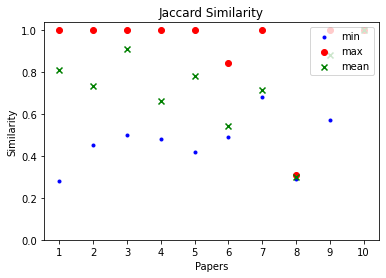

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    new_df = new_df.append(df0.iloc[i])
    for j in range(len(df3)):
      if j%10 == i:
        new_df = new_df.append(df3.iloc[j])
    vals = jaccard_rel(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/Exp3/exp3_jaccard_rel', dpi=100)
plt.show()

## Exp 4

[0.63, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.63, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.41, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.41, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.41, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.41, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.41, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.41, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.41, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.41, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 0.47, 1.0, 1.0, 1.0, 0.48, 1.0, 0.28, 0.58, 1.0, 0.47, 1.0, 1.0, 1.0, 0.48, 1.0, 0.28, 0.58, 0.47, 0.47, 0.47, 0.47, 0.47, 0.53, 0.47, 0.32, 0.42, 1.0, 1.0, 0.47, 1.0, 1.0, 0.48, 1.0, 0.28, 0.58, 1.0, 1.0, 0.47, 1.0, 1.0, 0.48, 1.0, 0.28, 0.58, 1.0, 1.0, 0.47, 1.0, 1.0, 0.48, 1.0, 0.28, 0.58, 0.48, 0.48, 0.53, 0.48, 0.48, 0.48, 0.48, 0.4, 0.49, 1.0, 1.0, 0.47, 1.0, 1.0, 1.0, 0.48, 0.28, 0.58, 0.28, 0.28, 0.32, 0.28, 0.28, 0.28, 0.4, 0.28, 0.34, 0.58, 0.58, 0.42, 0.58, 0.58, 0.58, 0.49, 0.58, 0.34]
[1.0, 

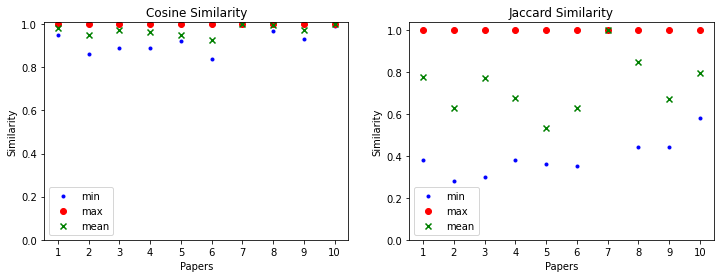

In [ ]:
fig = plt.figure(figsize=(12, 4))
gs = GridSpec(nrows=1, ncols=2)

ax = fig.add_subplot(gs[0, 0])
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_4)):
      if j%10 == i:
        embeds.append(all_embeddings_4[f"{j}"])
    vals = cosine(embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

ax1 = fig.add_subplot(gs[0, 1])
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df4)):
      if j%10 == i:
        new_df = new_df.append(df4.iloc[j])
    vals = jaccard(new_df["review"])
    ax1.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax1.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax1.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax1.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

plt.savefig(f'{path}/Exp4/inter_results', dpi=100)
plt.show()

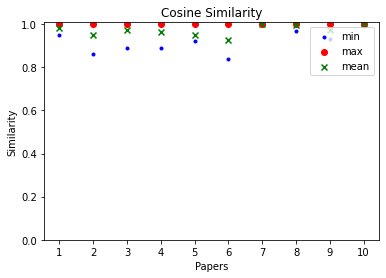

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_4)):
      if j%10 == i:
        embeds.append(all_embeddings_4[f"{j}"])
    vals = cosine(embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/Exp4/exp4_cosine', dpi=100)
plt.show()

[0.63, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.63, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.41, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.41, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.41, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.41, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.41, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.41, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.41, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.41, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 0.47, 1.0, 1.0, 1.0, 0.48, 1.0, 0.28, 0.58, 1.0, 0.47, 1.0, 1.0, 1.0, 0.48, 1.0, 0.28, 0.58, 0.47, 0.47, 0.47, 0.47, 0.47, 0.53, 0.47, 0.32, 0.42, 1.0, 1.0, 0.47, 1.0, 1.0, 0.48, 1.0, 0.28, 0.58, 1.0, 1.0, 0.47, 1.0, 1.0, 0.48, 1.0, 0.28, 0.58, 1.0, 1.0, 0.47, 1.0, 1.0, 0.48, 1.0, 0.28, 0.58, 0.48, 0.48, 0.53, 0.48, 0.48, 0.48, 0.48, 0.4, 0.49, 1.0, 1.0, 0.47, 1.0, 1.0, 1.0, 0.48, 0.28, 0.58, 0.28, 0.28, 0.32, 0.28, 0.28, 0.28, 0.4, 0.28, 0.34, 0.58, 0.58, 0.42, 0.58, 0.58, 0.58, 0.49, 0.58, 0.34]
[1.0, 

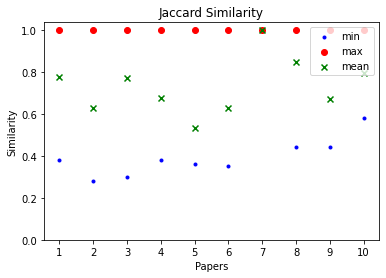

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df4)):
      if j%10 == i:
        new_df = new_df.append(df4.iloc[j])
    vals = jaccard(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/Exp4/exp4_jaccard', dpi=100)
plt.show()

11
[0, 1, 2, 3, 4, 10, 12, 18, 21, 23, 25, 26, 27, 29, 30, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 49, 51, 53, 54, 55, 59, 60, 63, 64, 65, 68, 69, 70, 71, 75, 78, 80, 82, 84, 86, 90, 92, 93, 97, 98, 99, 100, 102, 103, 104, 105, 110, 111, 113, 115, 117, 118, 119, 120, 121, 122, 123, 124, 126, 129, 130, 132, 133, 134, 137, 138, 140, 141, 142, 143, 145, 146, 147, 152, 153, 154, 155, 156, 157, 159, 161, 164, 166, 167, 168, 171, 172, 173, 176, 177] [0, 1, 2, 3, 4, 10, 12, 18, 21, 23, 25, 26, 27, 29, 30, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 49, 51, 53, 54, 55, 59, 60, 63, 64, 65, 68, 69, 70, 71, 75, 78, 80, 82, 84, 86, 90, 92, 93, 97, 98, 99, 100, 102, 103, 104, 105, 110, 111, 113, 115, 117, 118, 119, 120, 121, 122, 123, 124, 126, 129, 130, 132, 133, 134, 137, 138, 140, 141, 142, 143, 145, 146, 147, 152, 153, 154, 155, 156, 157, 159, 161, 164, 166, 167, 168, 171, 172, 173, 176, 177]
[0.41, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
11
[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14

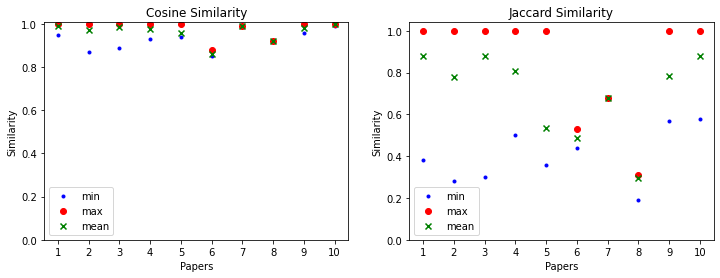

In [ ]:
fig = plt.figure(figsize=(12, 4))
gs = GridSpec(nrows=1, ncols=2)

ax = fig.add_subplot(gs[0, 0])
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_4)):
      if j%10 == i:
        embeds.append(all_embeddings_4[f"{j}"])
    vals = cosine_rel(all_embeddings_0[f"{i}"], embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

ax1 = fig.add_subplot(gs[0, 1])
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    new_df = new_df.append(df0.iloc[i])
    for j in range(len(df4)):
      if j%10 == i:
        new_df = new_df.append(df4.iloc[j])
    vals = jaccard_rel(new_df["review"])
    ax1.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax1.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax1.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax1.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

plt.savefig(f'{path}/Exp4/intra_results', dpi=100)
plt.show()

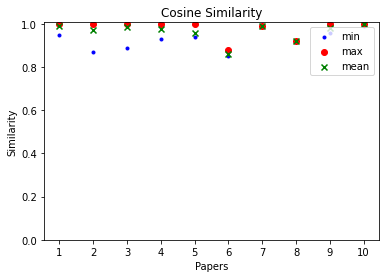

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_4)):
      if j%10 == i:
        embeds.append(all_embeddings_4[f"{j}"])
    vals = cosine_rel(all_embeddings_0[f"{i}"], embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/Exp4/exp4_cosine_rel', dpi=100)
plt.show()

11
[0, 1, 2, 3, 4, 10, 12, 18, 21, 23, 25, 26, 27, 29, 30, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 49, 51, 53, 54, 55, 59, 60, 63, 64, 65, 68, 69, 70, 71, 75, 78, 80, 82, 84, 86, 90, 92, 93, 97, 98, 99, 100, 102, 103, 104, 105, 110, 111, 113, 115, 117, 118, 119, 120, 121, 122, 123, 124, 126, 129, 130, 132, 133, 134, 137, 138, 140, 141, 142, 143, 145, 146, 147, 152, 153, 154, 155, 156, 157, 159, 161, 164, 166, 167, 168, 171, 172, 173, 176, 177] [0, 1, 2, 3, 4, 10, 12, 18, 21, 23, 25, 26, 27, 29, 30, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 49, 51, 53, 54, 55, 59, 60, 63, 64, 65, 68, 69, 70, 71, 75, 78, 80, 82, 84, 86, 90, 92, 93, 97, 98, 99, 100, 102, 103, 104, 105, 110, 111, 113, 115, 117, 118, 119, 120, 121, 122, 123, 124, 126, 129, 130, 132, 133, 134, 137, 138, 140, 141, 142, 143, 145, 146, 147, 152, 153, 154, 155, 156, 157, 159, 161, 164, 166, 167, 168, 171, 172, 173, 176, 177]
[0.41, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
11
[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14

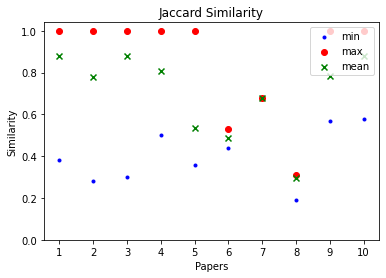

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    new_df = new_df.append(df0.iloc[i])
    for j in range(len(df4)):
      if j%10 == i:
        new_df = new_df.append(df4.iloc[j])
    vals = jaccard_rel(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/Exp4/exp4_jaccard_rel', dpi=100)
plt.show()

Exp4: This paper studies the Housing Market problem , where each agent can only receive a single object and has preferences over all objects . The authors consider whether an object is reachable for a given agent under a social network , where a trade between two agents is allowed if they are neighbors in the network and no participant has a deficit from the trade . Assume that the preferences of the agents are strict ( no tie among objects is allowed ) . This problem is polynomial-time solvable in a starnetwork and NP-complete in a tree-network . It is left as an open problem whether the problem is polylogarithmic time solvable when the network is a path or a star . The paper shows that when the preferences are weak ( ties among objects are allowed ) , the problem becomes NP-hard . Then , the authors show that the problem can be solved in polynomially time when the networks is path or star . Overall , the paper is well-written and easy to follow . However , I have the following concerns : 1 . The main idea of the proposed algorithm is to delete all agents and objects on the right of agent n ' in the initial endowment , and there is no guarantee that each object o_i will be moved to either the left or the right side of its original position in a reachable assignment ( i.e. , the most possible position for the left and one possible side for the right ) . 2 .In the proof of Theorem 2 , it is not clear to me how to prove that two relations oa i ob and ob i oa together imply that oa and ob are equivalent for agent i , denoted by ob =i oa . 3 .In Theorem 1 , it seems that the number of feasible swaps in an instance may increase . This may increase the searching space of the problem dramatically and make the problem harder to search for a solution .

----

Exp0: This paper studies the Housing Market problem , where each agent can only receive a single object and has preferences over all objects . The authors consider whether an object is reachable for a given agent under a social network , where a trade between two agents is allowed if they are neighbors in the network and no participant has a deficit from the trade . Assume that the preferences of the agents are strict ( no tie among objects is allowed ) . This problem is polynomial-time solvable in a starnetwork and NP-complete in a tree-network . It is left as an open problem whether the problem can be solved in polynomially time when the network is a path or a star . The paper shows that when the preferences are weak ( no ties among objects are allowed ) , the problem becomes NP-hard . Then , the authors show that the problem is solvable when the networks is path or star . This paper is well-written and easy to follow . However , I have the following concerns : 1 . The main idea of this paper is to study the problem of finding the optimal assignment for an agent in the housing market problem . But , it is not clear to me how to solve the problem in the social network setting . 2 .The paper is not well-organized . For example , in Section 2.3.1 , the definition of Pareto Efficiency is not clearly explained . 3 .In Section 3.2 , the proof of Theorem 2.1 and Theorem 3.1 are not clear . 4 .In Theorem 4 , the algorithm is not explained clearly . 5 .Theorem 4.1 is not proved clearly .

## Exp 5

[0.45, 0.44, 1.0, 1.0, 0.44, 0.59, 1.0, 0.44, 0.41, 0.45, 0.46, 0.45, 0.45, 0.42, 0.37, 0.45, 0.62, 0.58, 0.44, 0.46, 0.44, 0.44, 0.55, 0.34, 0.44, 0.47, 0.58, 1.0, 0.45, 0.44, 1.0, 0.44, 0.59, 1.0, 0.44, 0.41, 1.0, 0.45, 0.44, 1.0, 0.44, 0.59, 1.0, 0.44, 0.41, 0.44, 0.42, 0.55, 0.44, 0.44, 0.38, 0.44, 0.43, 0.59, 0.59, 0.37, 0.34, 0.59, 0.59, 0.38, 0.59, 0.37, 0.36, 1.0, 0.45, 0.44, 1.0, 1.0, 0.44, 0.59, 0.44, 0.41, 0.44, 0.62, 0.47, 0.44, 0.44, 0.43, 0.37, 0.44, 0.53, 0.41, 0.58, 0.58, 0.41, 0.41, 0.59, 0.36, 0.41, 0.53]
[0.43, 1.0, 1.0, 1.0, 0.45, 0.48, 1.0, 0.48, 1.0, 0.43, 0.43, 0.43, 0.43, 0.39, 0.41, 0.43, 0.41, 0.43, 1.0, 0.43, 1.0, 1.0, 0.45, 0.48, 1.0, 0.48, 1.0, 1.0, 0.43, 1.0, 1.0, 0.45, 0.48, 1.0, 0.48, 1.0, 1.0, 0.43, 1.0, 1.0, 0.45, 0.48, 1.0, 0.48, 1.0, 0.45, 0.39, 0.45, 0.45, 0.45, 0.78, 0.45, 0.78, 0.45, 0.48, 0.41, 0.48, 0.48, 0.48, 0.78, 0.48, 1.0, 0.48, 1.0, 0.43, 1.0, 1.0, 1.0, 0.45, 0.48, 0.48, 1.0, 0.48, 0.41, 0.48, 0.48, 0.48, 0.78, 1.0, 0.48, 0.48, 1.0, 0.43, 

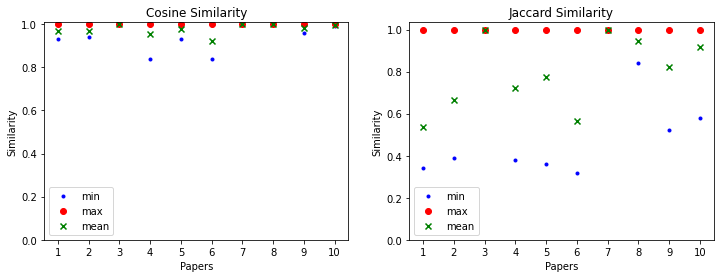

In [ ]:
fig = plt.figure(figsize=(12, 4))
gs = GridSpec(nrows=1, ncols=2)

ax = fig.add_subplot(gs[0, 0])
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_5)):
      if j%10 == i:
        embeds.append(all_embeddings_5[f"{j}"])
    vals = cosine(embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

ax1 = fig.add_subplot(gs[0, 1])
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df5)):
      if j%10 == i:
        new_df = new_df.append(df5.iloc[j])
    vals = jaccard(new_df["review"])
    ax1.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax1.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax1.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax1.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

plt.savefig(f'{path}/Exp5/inter_results', dpi=100)
plt.show()

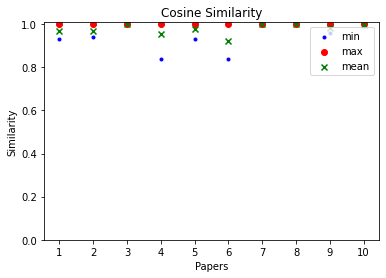

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_5)):
      if j%10 == i:
        embeds.append(all_embeddings_5[f"{j}"])
    vals = cosine(embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/Exp5/exp5_cosine', dpi=100)
plt.show()

[0.45, 0.44, 1.0, 1.0, 0.44, 0.59, 1.0, 0.44, 0.41, 0.45, 0.46, 0.45, 0.45, 0.42, 0.37, 0.45, 0.62, 0.58, 0.44, 0.46, 0.44, 0.44, 0.55, 0.34, 0.44, 0.47, 0.58, 1.0, 0.45, 0.44, 1.0, 0.44, 0.59, 1.0, 0.44, 0.41, 1.0, 0.45, 0.44, 1.0, 0.44, 0.59, 1.0, 0.44, 0.41, 0.44, 0.42, 0.55, 0.44, 0.44, 0.38, 0.44, 0.43, 0.59, 0.59, 0.37, 0.34, 0.59, 0.59, 0.38, 0.59, 0.37, 0.36, 1.0, 0.45, 0.44, 1.0, 1.0, 0.44, 0.59, 0.44, 0.41, 0.44, 0.62, 0.47, 0.44, 0.44, 0.43, 0.37, 0.44, 0.53, 0.41, 0.58, 0.58, 0.41, 0.41, 0.59, 0.36, 0.41, 0.53]
[0.43, 1.0, 1.0, 1.0, 0.45, 0.48, 1.0, 0.48, 1.0, 0.43, 0.43, 0.43, 0.43, 0.39, 0.41, 0.43, 0.41, 0.43, 1.0, 0.43, 1.0, 1.0, 0.45, 0.48, 1.0, 0.48, 1.0, 1.0, 0.43, 1.0, 1.0, 0.45, 0.48, 1.0, 0.48, 1.0, 1.0, 0.43, 1.0, 1.0, 0.45, 0.48, 1.0, 0.48, 1.0, 0.45, 0.39, 0.45, 0.45, 0.45, 0.78, 0.45, 0.78, 0.45, 0.48, 0.41, 0.48, 0.48, 0.48, 0.78, 0.48, 1.0, 0.48, 1.0, 0.43, 1.0, 1.0, 1.0, 0.45, 0.48, 0.48, 1.0, 0.48, 0.41, 0.48, 0.48, 0.48, 0.78, 1.0, 0.48, 0.48, 1.0, 0.43, 

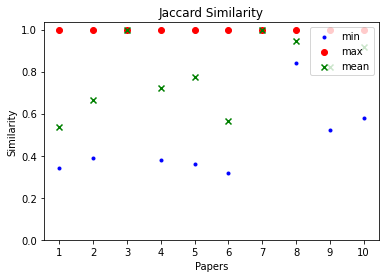

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df5)):
      if j%10 == i:
        new_df = new_df.append(df5.iloc[j])
    vals = jaccard(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/Exp5/exp5_jaccard', dpi=100)
plt.show()

11
[0, 1, 2, 3, 4, 9, 15, 26, 35, 37, 41, 46, 50, 53, 55, 60, 63, 66, 68, 71, 74, 77, 79, 80, 82, 83, 88, 91, 94, 97, 98, 100, 101, 103, 104, 105, 109, 110, 111, 112, 115, 121, 124, 126, 129, 131, 135, 139, 141, 146, 147, 148, 149, 150, 151, 152, 153, 162, 163, 164, 168, 170, 171, 172, 174, 175, 180, 182, 183, 186, 191, 193, 200, 201, 202, 205, 206, 208, 209, 211, 212, 214, 215, 216, 221, 222, 223, 226, 227, 228, 230, 231, 237, 239, 240, 241, 246, 247, 248, 249, 253, -1, -1, -1, -1, -1, -1] [1, 2, 3, 4, 5, 6, 7, 9, 12, 18, 19, 24, 25, 26, 32, 35, 36, 37, 38, 46, 50, 51, 55, 63, 66, 68, 71, 73, 74, 75, 76, 78, 79, 80, 83, 84, 85, 87, 88, 92, 97, 99, 102, 111, 113, 115, 117, 124, 125, 127, 131, 134, 136, 138, 139, 144, 146, 147, 149, 150, 151, 152, 154, 157, 158, 160, 161, 162, 163, 164, 165, 168, 171, 172, 175, 180, 182, 183, 185, 187, 189, 191, 200, 201, 209, 211, 212, 214, 215, 221, 222, 223, 225, 227, 228, 230, 231, 237, 238, 239, 241, 242, 244, 245, 252, 253, 254]
[1.0, 0.45, 0.44, 

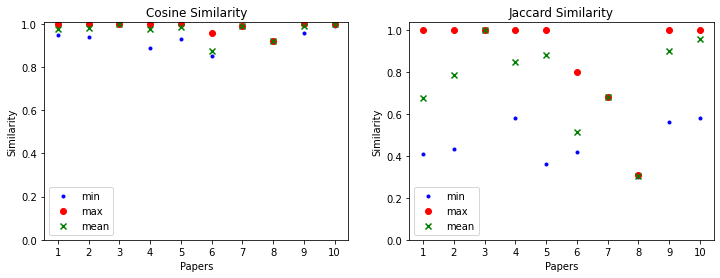

In [ ]:
fig = plt.figure(figsize=(12, 4))
gs = GridSpec(nrows=1, ncols=2)

ax = fig.add_subplot(gs[0, 0])
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_5)):
      if j%10 == i:
        embeds.append(all_embeddings_5[f"{j}"])
    vals = cosine_rel(all_embeddings_0[f"{i}"], embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

ax1 = fig.add_subplot(gs[0, 1])
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    new_df = new_df.append(df0.iloc[i])
    for j in range(len(df5)):
      if j%10 == i:
        new_df = new_df.append(df5.iloc[j])
    vals = jaccard_rel(new_df["review"])
    ax1.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax1.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax1.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax1.legend(('min', 'max', 'mean'), loc="best", scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")

plt.savefig(f'{path}/Exp5/intra_results', dpi=100)
plt.show()

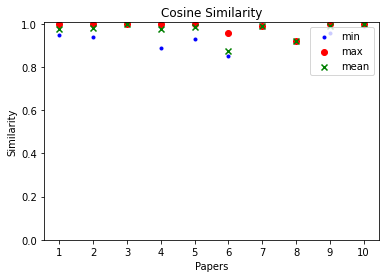

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    embeds = []
    for j in range(len(all_embeddings_5)):
      if j%10 == i:
        embeds.append(all_embeddings_5[f"{j}"])
    vals = cosine_rel(all_embeddings_0[f"{i}"], embeds)
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/Exp5/exp5_cosine_rel', dpi=100)
plt.show()

11
[0, 1, 2, 3, 4, 9, 15, 26, 35, 37, 41, 46, 50, 53, 55, 60, 63, 66, 68, 71, 74, 77, 79, 80, 82, 83, 88, 91, 94, 97, 98, 100, 101, 103, 104, 105, 109, 110, 111, 112, 115, 121, 124, 126, 129, 131, 135, 139, 141, 146, 147, 148, 149, 150, 151, 152, 153, 162, 163, 164, 168, 170, 171, 172, 174, 175, 180, 182, 183, 186, 191, 193, 200, 201, 202, 205, 206, 208, 209, 211, 212, 214, 215, 216, 221, 222, 223, 226, 227, 228, 230, 231, 237, 239, 240, 241, 246, 247, 248, 249, 253, -1, -1, -1, -1, -1, -1] [1, 2, 3, 4, 5, 6, 7, 9, 12, 18, 19, 24, 25, 26, 32, 35, 36, 37, 38, 46, 50, 51, 55, 63, 66, 68, 71, 73, 74, 75, 76, 78, 79, 80, 83, 84, 85, 87, 88, 92, 97, 99, 102, 111, 113, 115, 117, 124, 125, 127, 131, 134, 136, 138, 139, 144, 146, 147, 149, 150, 151, 152, 154, 157, 158, 160, 161, 162, 163, 164, 165, 168, 171, 172, 175, 180, 182, 183, 185, 187, 189, 191, 200, 201, 209, 211, 212, 214, 215, 221, 222, 223, 225, 227, 228, 230, 231, 237, 238, 239, 241, 242, 244, 245, 252, 253, 254]
[1.0, 0.45, 0.44, 

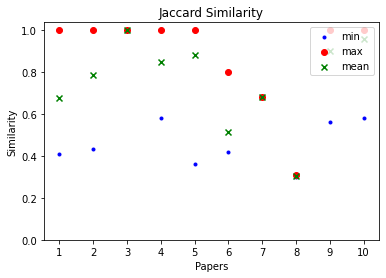

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    new_df = new_df.append(df0.iloc[i])
    for j in range(len(df5)):
      if j%10 == i:
        new_df = new_df.append(df5.iloc[j])
    vals = jaccard_rel(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Jaccard Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/Exp5/exp5_jaccard_rel', dpi=100)
plt.show()

# BERT embeddings

In [ ]:
def bert_similarity(reviews):
  sentences = [i for i in reviews]
  tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')
  model = AutoModel.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')

  # initialize dictionary that will contain tokenized sentences
  tokens = {'input_ids': [], 'attention_mask': []}

  for sentence in sentences:
      # tokenize sentence and append to dictionary lists
      new_tokens = tokenizer.encode_plus(sentence, max_length=128, truncation=True,
                                        padding='max_length', return_tensors='pt')
      tokens['input_ids'].append(new_tokens['input_ids'][0])
      tokens['attention_mask'].append(new_tokens['attention_mask'][0])

  # reformat list of tensors into single tensor
  tokens['input_ids'] = torch.stack(tokens['input_ids'])
  tokens['attention_mask'] = torch.stack(tokens['attention_mask'])

  outputs = model(**tokens)

  embeddings = outputs.last_hidden_state

  attention_mask = tokens['attention_mask']
  mask = attention_mask.unsqueeze(-1).expand(embeddings.size()).float()

  masked_embeddings = embeddings * mask
  summed = torch.sum(masked_embeddings, 1)
  summed_mask = torch.clamp(mask.sum(1), min=1e-9)
  mean_pooled = summed / summed_mask
  # convert from PyTorch tensor to numpy array
  mean_pooled = mean_pooled.detach().numpy()

  # calculate
  BERT = cosine_similarity(
      [mean_pooled[0]],
      mean_pooled[1:]
  )

  BERT = BERT.tolist()
  BERT = ["{:.3f}".format(i) for i in BERT[0]]; print(BERT)

  cosine_dist = list(map(float, BERT))
  stats = {
      'min_val': min(cosine_dist),
      'max_val': max(cosine_dist),
      'mean_val': mean(cosine_dist)}

  return stats

# BERT plots

## Exp 3


['0.967', '0.951', '0.951', '0.951', '0.951', '0.951', '0.951', '0.951', '0.910']
['0.883', '0.973', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']
['1.000', '1.000', '1.000', '1.000', '1.000', '0.944', '1.000', '0.923', '1.000']
['0.967', '0.967', '0.963', '0.963', '0.963', '0.961', '0.967', '0.963', '0.963']
['0.929', '0.917', '0.917', '1.000', '1.000', '1.000', '0.917', '1.000', '1.000']
['0.827', '0.769', '0.769', '0.769', '0.769', '0.769', '0.769', '0.708', '0.769']
['1.000', '1.000', '0.994', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']
['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']
['0.951', '0.763', '0.953', '1.000', '0.763', '0.763', '0.763', '0.763', '0.763']
['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']


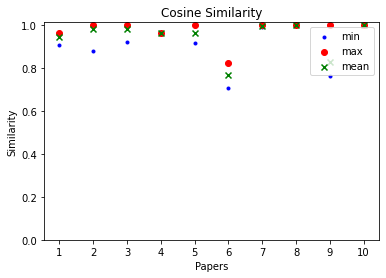

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df3)):
      if j%10 == i:
        new_df = new_df.append(df3.iloc[j])
    vals = bert_similarity(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/Exp3/exp3_cosine_BERT', dpi=100)
plt.show()

['0.951', '0.960', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '0.937']
['1.000', '0.883', '0.973', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']
['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '0.944', '1.000', '0.923', '1.000']
['0.963', '0.931', '0.931', '0.992', '1.000', '0.992', '0.989', '0.955', '1.000', '0.992']
['1.000', '0.929', '0.917', '0.917', '1.000', '1.000', '1.000', '0.917', '1.000', '1.000']
['0.809', '0.963', '0.798', '0.798', '0.798', '0.798', '0.798', '0.798', '0.921', '0.798']
['0.994', '0.994', '0.994', '1.000', '0.994', '0.994', '0.994', '0.994', '0.994', '0.994']
['0.761', '0.761', '0.761', '0.761', '0.761', '0.761', '0.761', '0.761', '0.761', '0.761']
['0.763', '0.785', '1.000', '0.778', '0.763', '1.000', '1.000', '1.000', '1.000', '1.000']
['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']


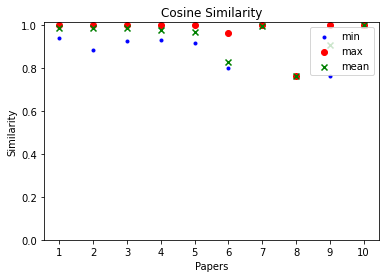

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    new_df = new_df.append(df0.iloc[i])
    for j in range(len(df3)):
      if j%10 == i:
        new_df = new_df.append(df3.iloc[j])
    vals = bert_similarity(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/Exp3/exp3_rel_cosine_BERT', dpi=100)
plt.show()

## Exp 4

['0.998', '0.951', '0.951', '0.951', '0.951', '0.951', '0.951', '0.951', '0.951']
['1.000', '0.988', '1.000', '1.000', '1.000', '0.871', '1.000', '0.831', '0.858']
['1.000', '1.000', '1.000', '1.000', '1.000', '0.965', '0.871', '1.000', '1.000']
['0.916', '0.916', '0.916', '0.901', '0.916', '0.918', '0.916', '0.897', '0.880']
['0.922', '0.917', '0.905', '1.000', '0.905', '0.917', '0.905', '0.905', '0.927']
['0.858', '0.982', '0.982', '0.858', '0.858', '0.858', '0.848', '0.684', '0.858']
['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']
['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']
['0.782', '1.000', '0.783', '0.767', '0.778', '1.000', '0.826', '1.000', '0.764']
['1.000', '1.000', '0.998', '0.998', '0.998', '1.000', '1.000', '1.000', '1.000']


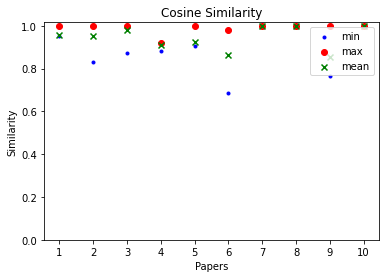

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df4)):
      if j%10 == i:
        new_df = new_df.append(df4.iloc[j])
    new_df = new_df.dropna()
    vals = bert_similarity(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/Exp4/exp4_cosine_BERT', dpi=100)
plt.show()

['0.951', '0.953', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']
['1.000', '1.000', '0.988', '1.000', '1.000', '1.000', '0.871', '1.000', '0.831', '0.858']
['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '0.965', '0.871', '1.000', '1.000']
['0.916', '1.000', '1.000', '1.000', '0.996', '1.000', '0.918', '1.000', '0.995', '0.972']
['1.000', '0.922', '0.917', '0.905', '1.000', '0.905', '0.917', '0.905', '0.905', '0.927']
['0.921', '0.798', '0.898', '0.898', '0.798', '0.798', '0.798', '0.790', '0.809', '0.798']
['0.994', '0.994', '0.994', '0.994', '0.994', '0.994', '0.994', '0.994', '0.994', '0.994']
['0.761', '0.761', '0.761', '0.761', '0.761', '0.761', '0.763', '0.761', '0.761', '0.761']
['1.000', '0.782', '1.000', '0.782', '0.766', '0.778', '1.000', '0.825', '1.000', '0.763']
['1.000', '1.000', '1.000', '0.998', '0.998', '0.998', '1.000', '1.000', '1.000', '1.000']


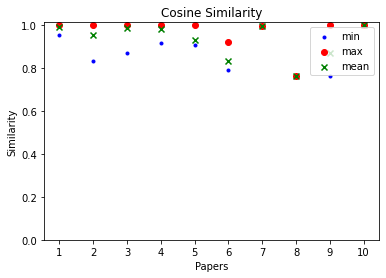

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    new_df = new_df.append(df0.iloc[i])
    for j in range(len(df4)):
      if j%10 == i:
        new_df = new_df.append(df4.iloc[j])
    new_df = new_df.dropna()
    vals = bert_similarity(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/Exp4/exp4_rel_cosine_BERT', dpi=100)
plt.show()

## Exp 5


['0.954', '0.951', '1.000', '1.000', '0.950', '0.970', '1.000', '0.953', '0.965']
['0.859', '1.000', '1.000', '1.000', '0.866', '0.871', '1.000', '0.871', '1.000']
['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']
['0.955', '0.955', '0.955', '0.955', '0.980', '0.946', '0.955', '0.941', '0.955']
['1.000', '1.000', '1.000', '1.000', '0.913', '0.905', '1.000', '1.000', '1.000']
['0.806', '0.778', '0.778', '0.778', '0.902', '0.893', '0.761', '0.902', '0.778']
['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']
['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']
['1.000', '1.000', '1.000', '0.763', '1.000', '0.763', '1.000', '0.778', '1.000']
['1.000', '1.000', '0.998', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']


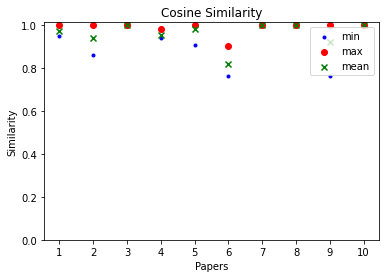

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df5)):
      if j%10 == i:
        new_df = new_df.append(df5.iloc[j])
    new_df = new_df.dropna()
    vals = bert_similarity(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/Exp5/exp5_cosine_BERT', dpi=100)
plt.show()

['1.000', '0.954', '0.951', '1.000', '1.000', '0.950', '0.970', '1.000', '0.953', '0.965']
['1.000', '0.859', '1.000', '1.000', '1.000', '0.866', '0.871', '1.000', '0.871', '1.000']
['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']
['0.955', '1.000', '1.000', '1.000', '1.000', '0.951', '0.992', '1.000', '0.977', '1.000']
['1.000', '1.000', '1.000', '1.000', '1.000', '0.913', '0.905', '1.000', '1.000', '1.000']
['0.976', '0.827', '0.798', '0.798', '0.798', '0.898', '0.896', '0.809', '0.898', '0.798']
['0.994', '0.994', '0.994', '0.994', '0.994', '0.994', '0.994', '0.994', '0.994', '0.994']
['0.761', '0.761', '0.761', '0.761', '0.761', '0.761', '0.761', '0.761', '0.761', '0.761']
['1.000', '1.000', '1.000', '1.000', '0.763', '1.000', '0.763', '1.000', '0.778', '1.000']
['1.000', '1.000', '1.000', '0.998', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']


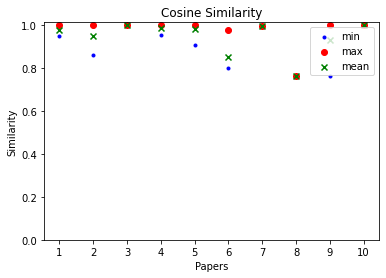

In [ ]:
fig, ax = plt.subplots()
for i in range(10):
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    new_df = new_df.append(df0.iloc[i])
    for j in range(len(df5)):
      if j%10 == i:
        new_df = new_df.append(df5.iloc[j])
    new_df = new_df.dropna()
    vals = bert_similarity(new_df["review"])
    ax.scatter(i + 1, vals['min_val'], c='blue', marker='.')
    ax.scatter(i + 1, vals['max_val'], c='red', marker='o')
    ax.scatter(i + 1, vals['mean_val'], c='green', marker='x')
ax.legend(('min', 'max', 'mean'), loc=1, scatterpoints=1)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Cosine Similarity")
plt.xlabel("Papers")
plt.ylabel("Similarity")
plt.savefig(f'{path}/Exp5/exp5_rel_cosine_BERT', dpi=100)
plt.show()

# Histograms

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def clean_sentence(review):

  review = re.sub(r'[^\w\s]', '', review)
  
  stop_words = set(stopwords.words('english'))
  
  word_tokens = word_tokenize(review.lower())
  
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  
  filtered_sentence = []
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)

  return ' '.join(filtered_sentence)

## Exp 3

### (Paper 1)

In [ ]:
for i in range(1):
    i=0
    main = clean_sentence(df0["review"].iloc[i])
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df3)):
      if j%10 == i:
        new_df = new_df.append(df3.iloc[j])
    for i in range(len(new_df)):
      new_df["review"].iloc[i] = clean_sentence(new_df["review"].iloc[i])
    counters = [Counter(i.split(" ")) for i in new_df["review"]]
    main_count = Counter(main.split(" "))
    final_count = Counter()
    final_main = Counter()
    for i in range(len(counters)):
      final_main += main_count
      final_count += counters[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

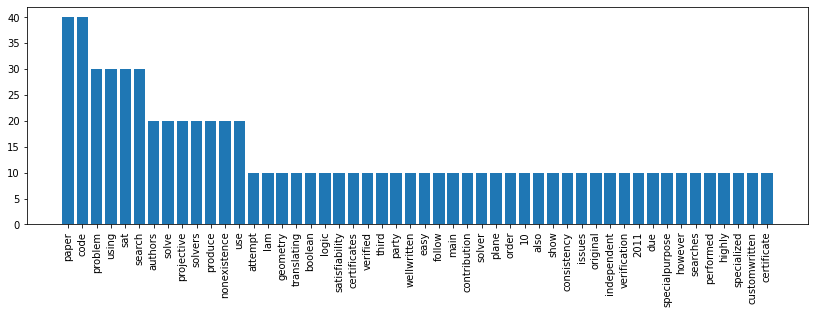

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_main.most_common(50))), list(map(lambda x: x[1], final_main.most_common(50))))
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

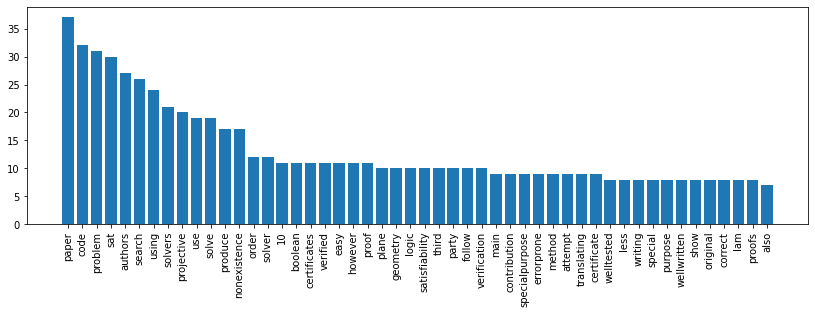

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_count.most_common(50))), list(map(lambda x: x[1], final_count.most_common(50))))
plt.xticks(rotation=90)

### (All)

In [ ]:
final_df3 = Counter()
final_df0 = Counter()

for i in range(10):
    main = clean_sentence(df0["review"].iloc[i])
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df3)):
      if j%10 == i:
        new_df = new_df.append(df3.iloc[j])
    for i in range(len(new_df)):
      new_df["review"].iloc[i] = clean_sentence(new_df["review"].iloc[i])
    counters = [Counter(i.split(" ")) for i in new_df["review"]]
    main_count = Counter(main.split(" "))
    for i in range(len(counters)):
      final_df0 += main_count
      final_df3 += counters[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

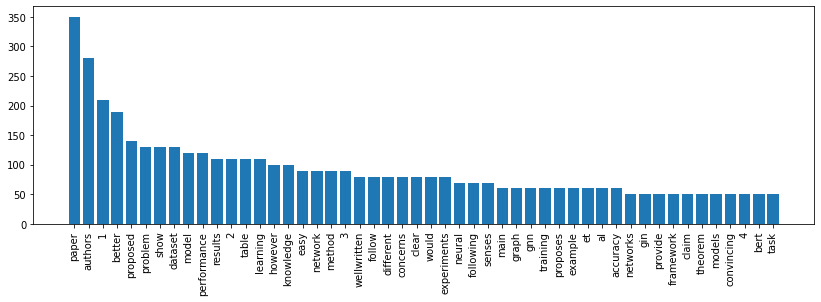

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_df0.most_common(50))), list(map(lambda x: x[1], final_df0.most_common(50))))
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

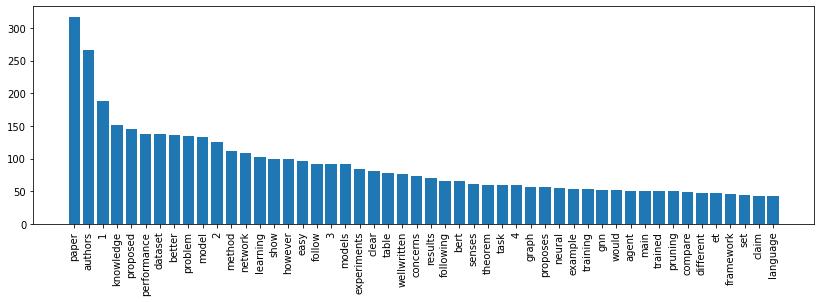

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_df3.most_common(50))), list(map(lambda x: x[1], final_df3.most_common(50))))
plt.xticks(rotation=90)

## Exp 4

### (Paper 2)

In [ ]:
for i in range(1):
    i=1
    main = clean_sentence(df0["review"].iloc[i])
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df4)):
      if j%10 == i:
        new_df = new_df.append(df4.iloc[j])
    for i in range(len(new_df)):
      new_df["review"].iloc[i] = clean_sentence(new_df["review"].iloc[i])
    counters = [Counter(i.split(" ")) for i in new_df["review"]]
    main_count = Counter(main.split(" "))
    final_count = Counter()
    final_main = Counter()
    for i in range(len(counters)):
      final_main += main_count
      final_count += counters[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

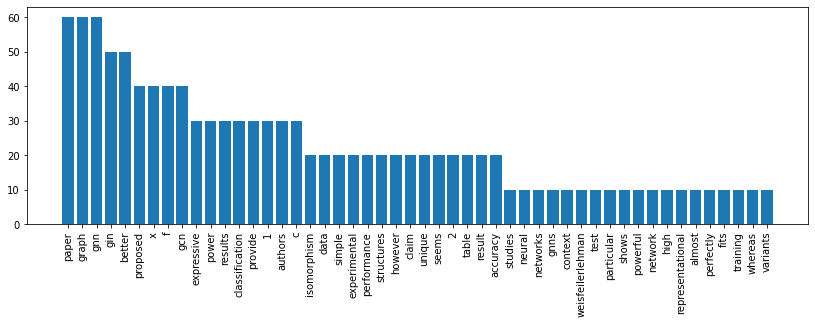

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_main.most_common(50))), list(map(lambda x: x[1], final_main.most_common(50))))
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

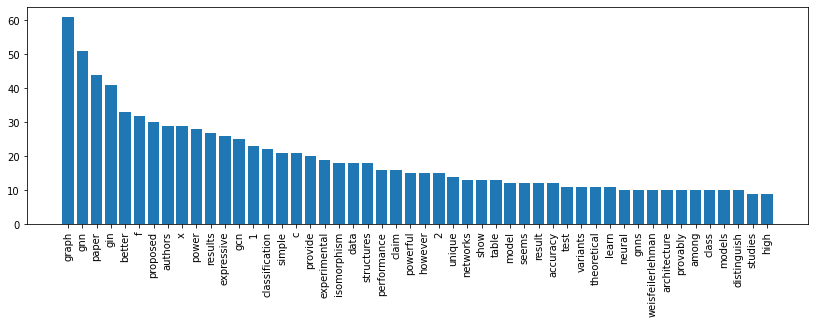

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_count.most_common(50))), list(map(lambda x: x[1], final_count.most_common(50))))
plt.xticks(rotation=90)

### (All)

In [ ]:
final_df4 = Counter()
final_df0 = Counter()

for i in range(10):
    main = clean_sentence(df0["review"].iloc[i])
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df4)):
      if j%10 == i:
        new_df = new_df.append(df4.iloc[j])
    for i in range(len(new_df)):
      new_df["review"].iloc[i] = clean_sentence(new_df["review"].iloc[i])
    counters = [Counter(i.split(" ")) for i in new_df["review"]]
    main_count = Counter(main.split(" "))
    for i in range(len(counters)):
      final_df0 += main_count
      final_df4 += counters[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

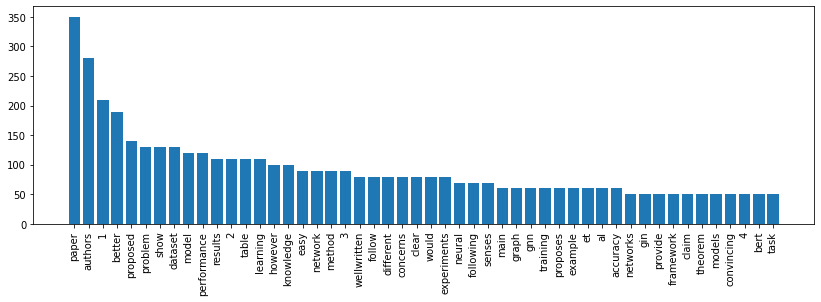

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_df0.most_common(50))), list(map(lambda x: x[1], final_df0.most_common(50))))
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

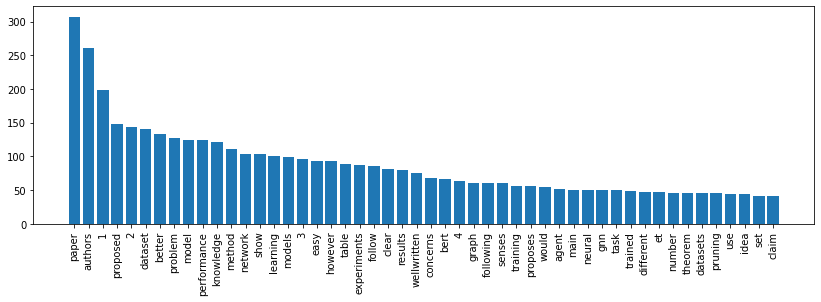

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_df4.most_common(50))), list(map(lambda x: x[1], final_df4.most_common(50))))
plt.xticks(rotation=90)

## Exp 5

### (Paper 6)

In [ ]:
for i in range(1):
    i=5
    main = clean_sentence(df0["review"].iloc[i])
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df5)):
      if j%10 == i:
        new_df = new_df.append(df5.iloc[j])
    for i in range(len(new_df)):
      new_df["review"].iloc[i] = clean_sentence(new_df["review"].iloc[i])
    counters = [Counter(i.split(" ")) for i in new_df["review"]]
    main_count = Counter(main.split(" "))
    final_count = Counter()
    final_main = Counter()
    for i in range(len(counters)):
      final_main += main_count
      final_count += counters[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

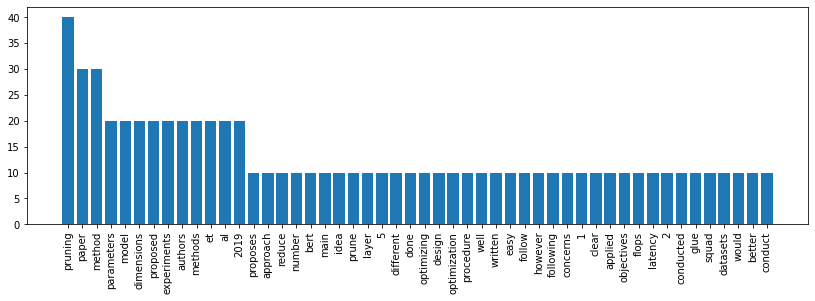

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_main.most_common(50))), list(map(lambda x: x[1], final_main.most_common(50))))
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

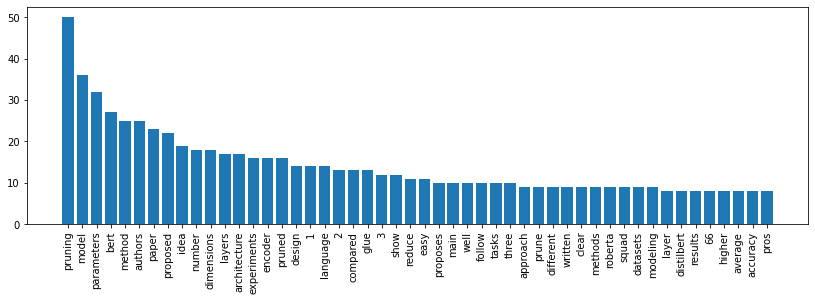

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_count.most_common(50))), list(map(lambda x: x[1], final_count.most_common(50))))
plt.xticks(rotation=90)

### (All)

In [ ]:
final_df5 = Counter()
final_df0 = Counter()

for i in range(10):
    main = clean_sentence(df0["review"].iloc[i])
    new_df = pd.DataFrame(columns = ["review_no", "arxivId", "review"])
    for j in range(len(df5)):
      if j%10 == i:
        new_df = new_df.append(df5.iloc[j])
    for i in range(len(new_df)):
      new_df["review"].iloc[i] = clean_sentence(new_df["review"].iloc[i])
    counters = [Counter(i.split(" ")) for i in new_df["review"]]
    main_count = Counter(main.split(" "))
    for i in range(len(counters)):
      final_df0 += main_count
      final_df5 += counters[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

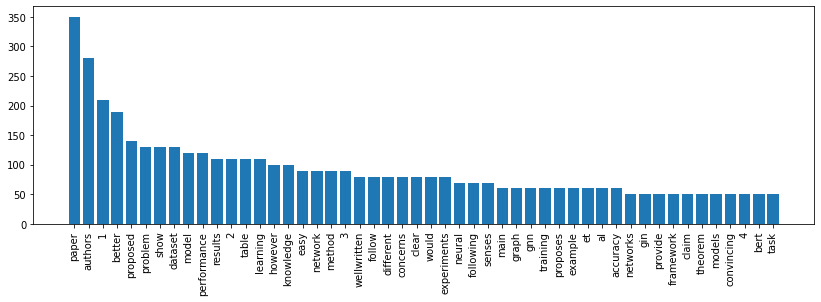

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_df0.most_common(50))), list(map(lambda x: x[1], final_df0.most_common(50))))
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

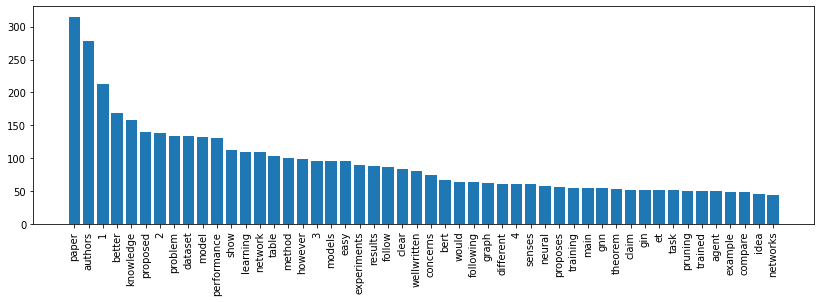

In [ ]:
plt.figure(figsize =(14,4))
plt.bar(list(map(lambda x: x[0], final_df5.most_common(50))), list(map(lambda x: x[1], final_df5.most_common(50))))
plt.xticks(rotation=90)